## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## 1. 在 Iris dataset 中，設定 criterion = 'entropy' (default='gini')。
  * Accuracy 相同
  * feature_importances_ 有些微的差異

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy')
# clf = DecisionTreeClassifier(criterion='gini')
# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
Feature importance:  [0.         0.0156062  0.62264163 0.36175217]


## 2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較
  * boston 無法使用 DecisionTreeClassifier
  * wine 可以使用 DecisionTreeClassifier and DecisionTreeRegressor

In [3]:
# boston 

boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 28.35


In [4]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)


In [5]:
# wine

wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("分類模型----")
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("回歸模型----")
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

分類模型----
Acuuracy:  0.9111111111111111
Feature importance:  [0.01364138 0.03076567 0.         0.         0.         0.08158611
 0.04296585 0.         0.         0.39953541 0.         0.04285558
 0.38865   ]
回歸模型----
Acuuracy:  0.9777777777777777
Feature importance:  [0.         0.01285659 0.         0.         0.         0.
 0.61367513 0.         0.         0.1214791  0.         0.
 0.25198917]


## Question: 此例中，iris的 data set 不論是 gini or entropy，不同的 Min_samples_split 與 Min_samples_leaf，其準確率都依樣耶，MSE也是。這正常嗎?
  * 決策樹中 Min_samples_split 與 Min_samples_leaf，這兩個超參數主要是避免 Over-fitting 而設置的，當設置的太小就容易過擬合。
  * 回到 Iris 資料集來看，其實這是一個相對簡單的資料集，不同類別之間的差異性很大，因此只要簡單幾個 features 就可以把類別區分出來，當模型有一定水準後當然就會準確率就會收斂在一個數值，這時如果硬要把模型 train 的更準就有可能導致過擬合。你可以試著把這些值都調更高試試看，模型的預測能力就會明顯下降囉。之後用在比較困難且資料量比較大的資料集時，我相信決策樹跟隨機森林就不太可能會有一模一樣的結果了!

## 使用export_graphviz函式來將樹的實際長相視覺化

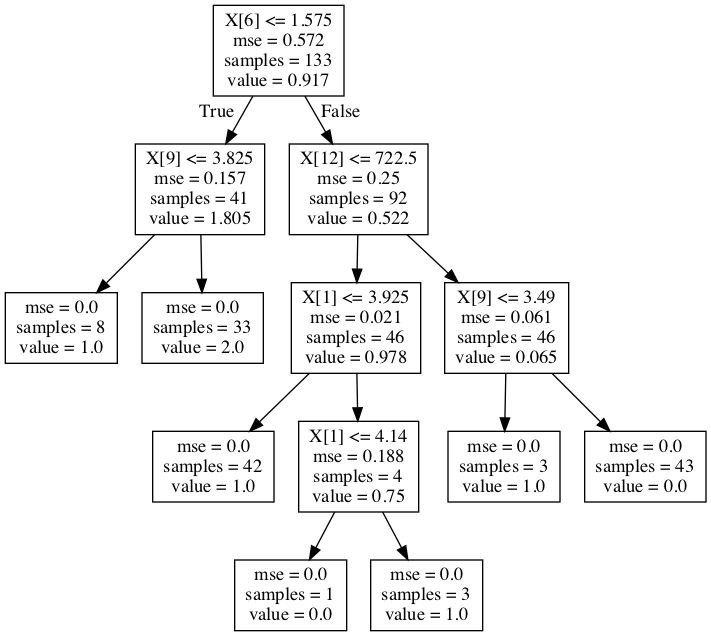

In [7]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

# dot_data = export_graphviz(clf, out_file=None, feature_names=['sepal length (cm)','petal length (cm)'])
dot_data = export_graphviz(clf, out_file=None)


graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())